In [2]:
import numpy as np
from torch import Tensor
from MLCode.utils import load_shuffled_cup, np_cup_TR, plot_NN_TR_VAL
from sklearn.preprocessing import StandardScaler
from MLCode.NN import NN_HyperParameters
from MLCode.NN_cup import NN_Regressor, train_NN_cup, save_training, train_NN_K_validation, saved_NN_models
import matplotlib.pyplot as plt

In [3]:
df = load_shuffled_cup()
X_dev, Y_dev = np_cup_TR(df, test=False)

Y_scaler = StandardScaler()
Y_scaler.fit(Y_dev)

X_dev, Y_dev = Tensor(X_dev), Tensor(Y_dev)

# 20% validation
val_samples = X_dev.shape[0] // 5
X_train = X_dev[:-val_samples]
Y_train = Y_dev[:-val_samples]

X_val = X_dev[-val_samples:]
Y_val = Y_dev[-val_samples:]

In [27]:
NN_HP = NN_HyperParameters(
    [10, 25, 25, 25, 25],
    lr=1.5E-2,
    beta1=0.9,
    beta2=0.999,
    weight_decay=0,
    mb_size=32,
)
net = NN_Regressor(2,NN_HP, Y_scaler)


# stats = train_NN_cup(net, X_train, Y_train, X_val, Y_val, 20,500)
stats = train_NN_K_validation(net, 5, X_dev, Y_dev)
save_training(stats, NN_HP)

layers = [ 10, 25, 25, 25, 25,]
lr = 0.015
beta1 = 0.9
beta2 = 0.999
weight_decay = 0
mb_size = 32

MEE mean: 2.9626412057857605
MEE std: 0.12260487972844275
Time (seconds): 17.072355235000032
Convergence: True


In [28]:
df = saved_NN_models()
df = df.sort_values(by=['MEE_mean'])
# select on number of layers:
# df = df[df['model_name'].str.startswith('3')]
df.head(10)


,model_name,MEE_mean,MEE_std
8,4x25_1.5E-02,2.962641,0.122605
0,4x20_1.5E-02,2.966110,0.153914
10,4x12_5.0E-03,2.983346,0.126115
5,4x20_1.0E-02,2.985100,0.123182
11,4x20_5.0E-03,2.986297,0.166470
9,4x15_1.0E-02,2.989811,0.135014
4,4x15_5.0E-03,2.993777,0.184234
2,4x15_1.5E-02,3.000274,0.101895
7,4x25_5.0E-03,3.009795,0.153712
6,4x25_1.0E-02,3.020151,0.169479


In [29]:
import pandas as pd
import seaborn as sns

df = saved_NN_models()
df = df.sort_values(by=['model_name'])
# select on number of layers:
df = df[df['model_name'].str.startswith('4')]

array = df['model_name'].to_numpy()
array = array.reshape(-1,3).transpose()
df2 = pd.DataFrame(array)
df2 = df2.reindex([2,0,1])
first_row = df2.iloc[0]
first_row = first_row.str.extract(pat = 'x(\d+)')[0]
n_hidden = first_row.astype('int')
col_order = n_hidden.to_numpy().argsort()
df2 = df2[col_order]
df2

,0,1,2,3
2,4x12_5.0E-03,4x15_5.0E-03,4x20_5.0E-03,4x25_5.0E-03
0,4x12_1.0E-02,4x15_1.0E-02,4x20_1.0E-02,4x25_1.0E-02
1,4x12_1.5E-02,4x15_1.5E-02,4x20_1.5E-02,4x25_1.5E-02


In [31]:
array = df['MEE_mean'].to_numpy()
array = array.reshape(-1,3).transpose()
df2 = pd.DataFrame(array)
df2 = df2.reindex([2,0,1])
df2 = df2[col_order]
df2

,0,1,2,3
2,2.983346,2.993777,2.986297,3.009795
0,3.041411,2.989811,2.985100,3.020151
1,3.044586,3.000274,2.966110,2.962641


' '

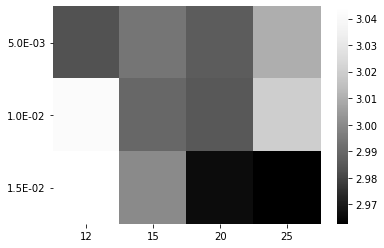

In [33]:
xticklabels = n_hidden[col_order]
yticklabels = ['5.0E-03', '1.0E-02', '1.5E-02']
sns.heatmap(df2.to_numpy(), xticklabels=xticklabels,yticklabels=yticklabels,cmap='Greys_r')
plt.yticks(rotation=0)
' '